Вывод ТОП-10 самых долгих этапов кредитного процесса

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
# === 1. Загрузка данных ===
main_process_path = "main_process.xlsx"
sub_process_path = "subprocess.xlsx"
main_df = pd.read_excel(main_process_path, sheet_name="Данные процесса")
sub_df = pd.read_excel(sub_process_path, sheet_name="Данные процесса")

In [19]:
# === 2. Группировка по элементам процесса ===
main_summary = (
    main_df.groupby("element_id / ID элемента BPMN-процесса")["duration_seconds / Длительность"]
    .agg(["mean", "median", "count"])
    .sort_values("mean", ascending=False)
)

sub_summary = (
    sub_df.groupby("element_id / ID элемента BPMN-процесса")["duration_seconds / Длительность"]
    .agg(["mean", "median", "count"])
    .sort_values("mean", ascending=False)
)


ТОП-10 самых долгих этапов основного процесса:

                                              mean  median  count
element_id / ID элемента BPMN-процесса                           
Activity_1c5ps4k                        209.920021   210.0   9490
n8                                       84.020282    40.0   7593
n4                                       82.117281    82.0   9490
n3                                       59.510854    59.0   9490
n7                                       49.633474    50.0   6859
n6                                       29.543625    29.0   9490
n9                                       19.545443    19.0   7570
n2                                       19.514900    20.0  10000
Activity_033yu25                          6.004310     6.0   9977
Activity_00jbzhh                          5.986400     6.0  10000

ТОП-10 самых долгих этапов подпроцесса (БКИ):

                                              mean  median  count
element_id / ID элемента BPMN-процесса        

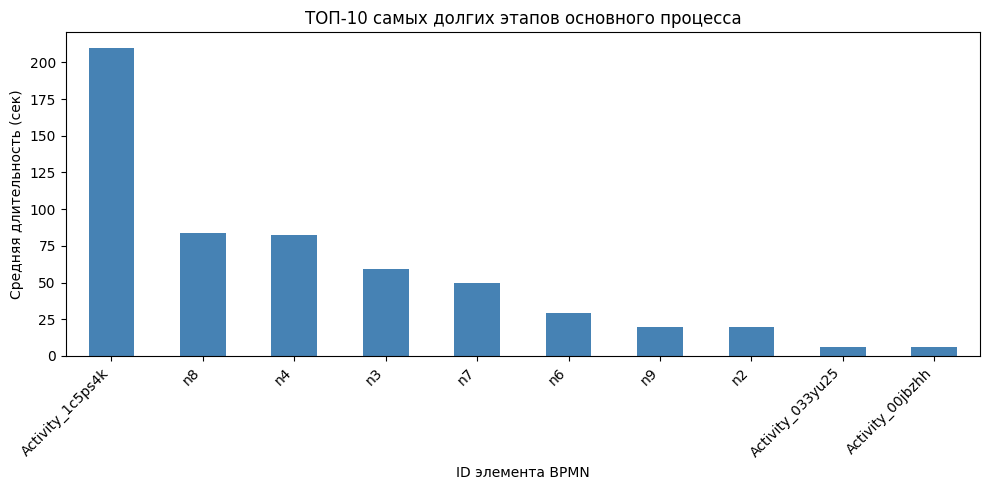

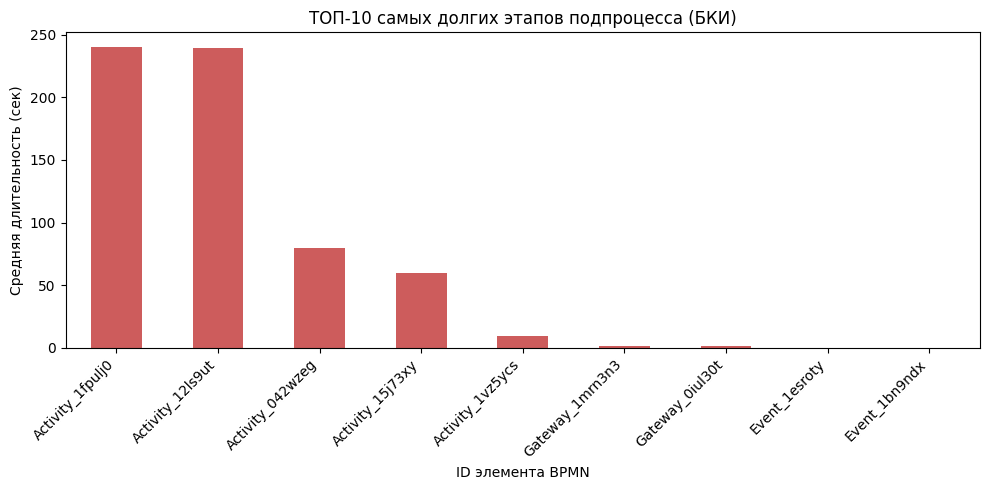

In [20]:
# === 3. Вывод ТОП-10 самых долгих этапов ===
print("ТОП-10 самых долгих этапов основного процесса:\n")
print(main_summary.head(10))
print("\nТОП-10 самых долгих этапов подпроцесса (БКИ):\n")
print(sub_summary.head(10))

# === 4. Построение диаграмм ===
plt.figure(figsize=(10, 5))
main_summary["mean"].head(10).plot(kind="bar", color="steelblue")
plt.title("ТОП-10 самых долгих этапов основного процесса")
plt.ylabel("Средняя длительность (сек)")
plt.xlabel("ID элемента BPMN")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
sub_summary["mean"].head(10).plot(kind="bar", color="indianred")
plt.title("ТОП-10 самых долгих этапов подпроцесса (БКИ)")
plt.ylabel("Средняя длительность (сек)")
plt.xlabel("ID элемента BPMN")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()